# MV Optimization Details

## Portfolio Fundamentals

The risk of a portfolio is a **nonlinear** function of asset risks: covariances matter. 
Optimal portfolios either (i) maximize expected return for a given risk or (ii) minimize risk for a given return.

### Portfolio mean and variance; diversification

For two assets with weights $w$ and $1-w$:
$$
\mu_p = w \, \mu_b + (1-w)\, \mu_s
$$
$$
\sigma_p^2 = w^2 \sigma_b^2 + (1-w)^2 \sigma_s^2 + 2w(1-w)\rho \sigma_b \sigma_s
$$

- Volatility is **linear in weights only if** $\rho = 1$.
- Diversification occurs whenever $\rho < 1$ (it does **not** require $\rho \le 0$).

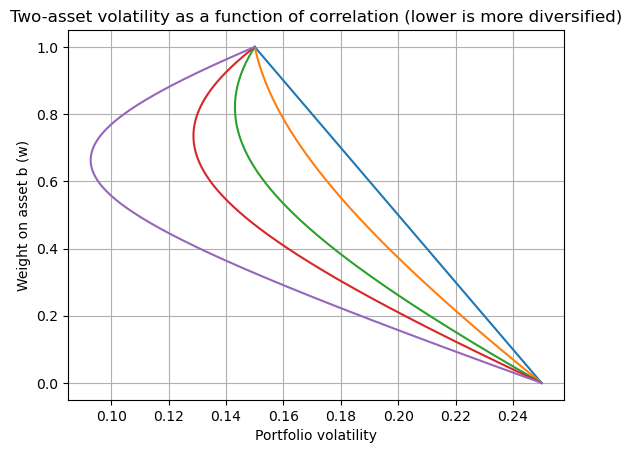

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

mu_b, mu_s = 0.08, 0.12
sig_b, sig_s = 0.15, 0.25

ws = np.linspace(0, 1, 251)
def port_stats(w, rho):
    mu = w*mu_b + (1-w)*mu_s
    var = (w**2)*(sig_b**2) + ((1-w)**2)*(sig_s**2) + 2*w*(1-w)*rho*sig_b*sig_s
    return mu, np.sqrt(var)

fig, ax = plt.subplots()
for rho in [1.0, 0.7, 0.3, 0.0, -0.5]:
    sigmas = [port_stats(w, rho)[1] for w in ws]
    ax.plot(sigmas, ws)  # plot risk vs weight to show curvature changes
ax.set_xlabel("Portfolio volatility")
ax.set_ylabel("Weight on asset b (w)")
ax.set_title("Two-asset volatility as a function of correlation (lower is more diversified)")
ax.grid(True)
plt.show()


### Perfect hedge ($\rho=-1$)
With two assets and $\rho = -1$, set weights so that $\sigma_p=0$:
$$
\frac{w_s}{w_b} = \frac{\sigma_b}{\sigma_s} \, .
$$

## Diversification across *n* assets (general results)

Let there be *n* risky assets with volatilities $\sigma_i$ and covariances $\sigma_{i,j}$. For portfolio weights $w_i$ with $\sum_i w_i = 1$, the variance is

$$
\sigma_p^2 = \sum_{i=1}^n \sum_{j=1}^n w_i w_j \sigma_{i,j}.
$$

### Equally weighted case
For $w_i = \frac{1}{n}$,

$$
\sigma_p^2 = \frac{1}{n^2}\sum_{i=1}^n \sigma_i^2 \;+\; \frac{1}{n^2} \sum_{i\ne j} \sigma_{i,j}.
$$

Define the across-asset averages

$$
\operatorname{avg}[\sigma_i^2] = \frac{1}{n}\sum_{i=1}^n \sigma_i^2, 
\qquad
\operatorname{avg}[\sigma_{i,j}] = \frac{1}{n(n-1)}\sum_{i\ne j} \sigma_{i,j}.
$$

Then

$$
\sigma_p^2 = \frac{1}{n}\operatorname{avg}[\sigma_i^2] + \frac{n-1}{n}\operatorname{avg}[\sigma_{i,j}].
$$

As $n\to\infty$ with a diversified portfolio (no single name has material weight), the idiosyncratic term vanishes:

$$
\lim_{n\to\infty} \sigma_p^2 = \operatorname{avg}[\sigma_{i,j}].
$$

### Identical vol and correlation
If $\sigma_i=\sigma$ for all *i* and $\rho_{i,j}=\rho$ for $i\neq j$:

$$
\sigma_p^2 = \frac{1}{n}\sigma^2 + \frac{n-1}{n}\rho\sigma^2 \;\;\xrightarrow[n\to\infty]{}\;\; \rho\sigma^2.
$$

- **Systematic risk:** $\rho\sigma^2$  
- **Idiosyncratic risk:** $\frac{1}{n}\sigma^2$ (diversifiable)

> Special cases:  
> • $\rho=1$: no diversification, $\sigma_p^2=\sigma^2$.  
> • $\rho=0$: fully diversifiable, $\sigma_p^2=\frac{1}{n}\sigma^2 \to 0$.  
> • With two assets and $\rho=-1$, one can choose weights to make $\sigma_p=0$.

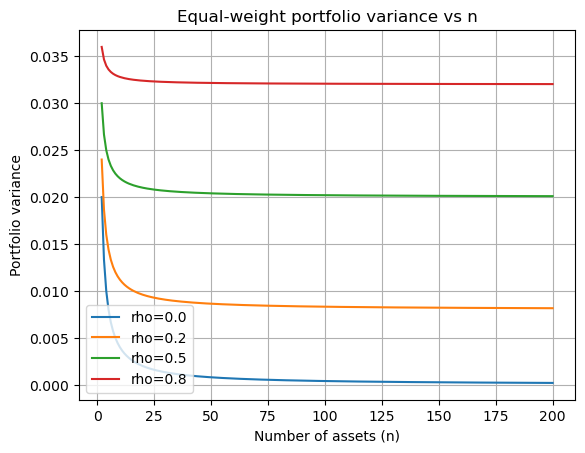

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
sig2 = 0.2**2
rhos = [0.0, 0.2, 0.5, 0.8]
ns = np.arange(2, 201)

def portfolio_var_equal(n, rho, sig2=sig2):
    # identical variances and pairwise correlation rho
    return (1/n)*sig2 + ((n-1)/n)*rho*sig2

fig, ax = plt.subplots()
for rho in rhos:
    vars_ = [portfolio_var_equal(n, rho) for n in ns]
    ax.plot(ns, vars_, label=f"rho={rho}")
ax.set_xlabel("Number of assets (n)")
ax.set_ylabel("Portfolio variance")
ax.set_title("Equal-weight portfolio variance vs n")
ax.grid(True)
ax.legend()
plt.show()


## Mean–Variance (MV) optimization (no risk-free asset)

Let $r \in \mathbb{R}^n$ denote asset returns with mean $\mu = \mathbb{E}[r]$ and covariance $\Sigma \succ 0$.
A portfolio is $\omega\in\mathbb{R}^n$ with $\omega^\top \mathbf{1} = 1$.

We solve, for a target mean $\mu_p$:

$$
\min_{\omega} \ \omega^\top \Sigma \omega \quad 
\text{s.t.} \quad \omega^\top \mu = \mu_p, \ \omega^\top \mathbf{1}=1.
$$

Lagrangian $\mathcal{L} = \tfrac12 \omega^\top \Sigma \omega - \gamma_1(\omega^\top \mu - \mu_p) - \gamma_2(\omega^\top \mathbf{1}-1)$.  
FOC: $\Sigma \omega - \gamma_1 \mu - \gamma_2 \mathbf{1} = 0 \Rightarrow \omega^* = \gamma_1 \Sigma^{-1}\mu + \gamma_2 \Sigma^{-1}\mathbf{1}$.

Define the two special MV portfolios

$$
\omega_t \equiv \frac{\Sigma^{-1}\mu}{\mathbf{1}^\top \Sigma^{-1}\mu},
\qquad
\omega_v \equiv \frac{\Sigma^{-1}\mathbf{1}}{\mathbf{1}^\top \Sigma^{-1}\mathbf{1}}.
$$

Then **every** MV portfolio can be written as

$$
\omega^* = \delta\,\omega_t + (1-\delta)\,\omega_v,
$$

for a suitable $\delta \in \mathbb{R}$.  

Here, $\omega_v$ is the **Global Minimum Variance (GMV)** portfolio; $\omega_t$ is the portfolio on the risky MV frontier whose tangent passes through the origin.

## MV with a risk-free asset (excess returns, tangency, CML)

Let $r_f$ be the risk-free rate and define **excess means** $\tilde{\mu} \equiv \mu - \mathbf{1} r_f$.  
We now choose weights **only on risky assets** $w$ (the remainder $1 - \mathbf{1}^\top w$ sits in the risk-free asset).

For a target excess mean $\tilde{\mu}_p$, solve
$$
\min_{w} \ w^\top \Sigma w \quad \text{s.t.} \quad w^\top \tilde{\mu} = \tilde{\mu}_p.
$$
Solution:
$$
w^* = \tilde{\delta}\, w_t, \quad 
w_t \equiv \frac{\Sigma^{-1}\tilde{\mu}}{\mathbf{1}^\top \Sigma^{-1}\tilde{\mu}}, \quad 
\tilde{\delta} = \frac{\mathbf{1}^\top \Sigma^{-1}\tilde{\mu}}{\tilde{\mu}^\top \Sigma^{-1}\tilde{\mu}}\;\tilde{\mu}_p.
$$

Variance along the efficient line:
$$
\sigma_p^2 = \frac{\tilde{\mu}_p^2}{\tilde{\mu}^\top \Sigma^{-1}\tilde{\mu}}.
$$

- $w_t$ is the **tangency portfolio** (100% risky, max Sharpe on the risky frontier).  
- The **Capital Market Line (CML)** is the efficient straight line through $(0, r_f)$ with slope $\max SR = \sqrt{\tilde{\mu}^\top \Sigma^{-1}\tilde{\mu}}$.
- Any efficient portfolio is a mix of $w_t$ and the risk-free asset.

## Two-fund separation

- **Without** a risk-free asset: any MV portfolio is a linear combination of **two** MV portfolios (e.g., $\omega_t$ and $\omega_v$).
- **With** a risk-free asset: any efficient portfolio is a linear combination of the **tangency portfolio** $w_t$ and the **risk-free asset**.

## Orthogonal MV portfolios (uncorrelated construction)

For any MV portfolio $\omega_p \neq \omega_v$ with mean $\mu_p$, there exists another MV portfolio $\omega_o$ uncorrelated with $\omega_p$. Let

$$
\phi_0 = \mu^\top \Sigma^{-1}\mu, \quad 
\phi_1 = \mu^\top \Sigma^{-1}\mathbf{1}, \quad 
\phi_2 = \mathbf{1}^\top \Sigma^{-1}\mathbf{1}.
$$

Then the mean of the orthogonal portfolio is

$$
\mu_o = \frac{\phi_1 \mu_p - \phi_0}{\phi_2 \mu_p - \phi_1}.
$$

**Geometry:** in mean–vol space, draw the tangent at $\omega_p$; where it hits the vertical axis ($\sigma=0$) gives $\mu_o$.

## Complete Implementation

Below are complete, dependency-light helpers to compute GMV and tangency portfolios from $\mu$ and $\Sigma$, and to draw the risky MV frontier and the CML.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def gmv_weights(Sigma):
    """Global Minimum Variance portfolio weights."""
    inv = np.linalg.inv(Sigma)
    ones = np.ones(Sigma.shape[0])
    w = inv @ ones
    w = w / (ones @ inv @ ones)
    return w

def risky_tangency_weights(mu, Sigma, rf=0.0):
    """Tangency portfolio weights (risky assets only)."""
    tilde_mu = mu - rf
    inv = np.linalg.inv(Sigma)
    ones = np.ones(Sigma.shape[0])
    w = inv @ tilde_mu
    w = w / (ones @ inv @ tilde_mu)
    return w

def mv_frontier(mu, Sigma, num=100):
    """Return (sigmas, means) for the risky MV frontier (no rf)."""
    inv = np.linalg.inv(Sigma)
    ones = np.ones(Sigma.shape[0])
    phi0 = mu @ inv @ mu
    phi1 = mu @ inv @ ones
    phi2 = ones @ inv @ ones
    # Parameterize by target mean between GMV mean and a high value
    mu_gmv = (gmv_weights(Sigma) @ mu)
    mu_hi = float(max(mu_gmv*3, mu_gmv + np.sqrt(phi0)))  # heuristic span
    mus = np.linspace(mu_gmv*0.8, mu_hi, num)
    vars_ = (phi0 - 2*phi1*mus + phi2*mus**2) / (phi0*phi2 - phi1**2)
    sigs = np.sqrt(np.maximum(vars_, 0))
    return sigs, mus

def normalize_weights(w):
    """Normalize weights to sum to 1."""
    s = w.sum()
    return w / s

def mvp_weights(Sigma):
    """Minimum Variance Portfolio weights."""
    one = np.ones(Sigma.shape[0])
    w_unnorm = np.linalg.solve(Sigma, one)
    return normalize_weights(w_unnorm)

def tangency_weights(mu, Sigma):
    """Tangency portfolio weights."""
    w_unnorm = np.linalg.solve(Sigma, mu)
    return normalize_weights(w_unnorm)

def port_stats_from_w(w, mu, Sigma):
    """Portfolio statistics from weights."""
    mu_p = w @ mu
    sig_p = np.sqrt(w @ Sigma @ w)
    return mu_p, sig_p


### Example: 4-asset portfolio

In [ ]:
# Toy example with 4 assets
mu = np.array([0.06, 0.08, 0.10, 0.12])  # expected excess returns
std = np.array([0.10, 0.15, 0.20, 0.25])
corr = np.array([
    [1.0, 0.3, 0.2, 0.1],
    [0.3, 1.0, 0.4, 0.2],
    [0.2, 0.4, 1.0, 0.5],
    [0.1, 0.2, 0.5, 1.0],
])
Sigma = np.outer(std, std) * corr

wV = mvp_weights(Sigma)
wT = tangency_weights(mu, Sigma)

print("MVP weights:", np.round(wV, 4))
print("Tangency weights:", np.round(wT, 4))

# Portfolio statistics
mu_V, sig_V = port_stats_from_w(wV, mu, Sigma)
mu_T, sig_T = port_stats_from_w(wT, mu, Sigma)

print(f"\nMVP: μ={mu_V:.4f}, σ={sig_V:.4f}")
print(f"Tangency: μ={mu_T:.4f}, σ={sig_T:.4f}")


MVP weights: [0.7125 0.1818 0.0396 0.0661]
Tangency weights: [0.5465 0.2207 0.0863 0.1466]

MVP: μ=0.0692, σ=0.0909
Tangency: μ=0.0767, σ=0.0957


### Efficient frontier visualization

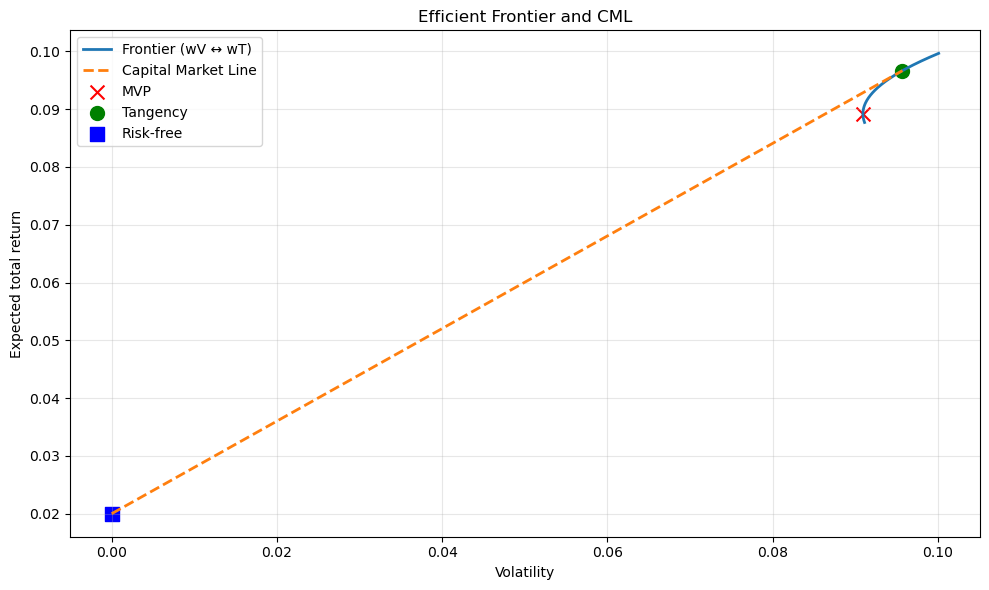

In [ ]:
# Frontier from combining wV and wT over delta grid
deltas = np.linspace(-0.2, 1.4, 161)
mus, sigs = [], []
for d in deltas:
    w = d*wT + (1-d)*wV
    m, s = port_stats_from_w(w, mu, Sigma)
    mus.append(m)
    sigs.append(s)

# Risk-free rate
rf = 0.02
# Translate to total return space for the plot: add rf back to excess return means
total_mus = np.array(mus) + rf
total_rf = rf

# CML: line through (0, rf) and the tangency point in total-return space
mu_T_excess, sig_T = port_stats_from_w(wT, mu, Sigma)
mu_T_total = mu_T_excess + rf

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(sigs, total_mus, label="Frontier (wV ↔ wT)", linewidth=2)
ax.plot([0, sig_T], [total_rf, mu_T_total], label="Capital Market Line", linewidth=2, linestyle='--')
ax.scatter([sig_V], [mu_V + rf], marker="x", s=100, label="MVP", color='red')
ax.scatter([sig_T], [mu_T_total], marker="o", s=100, label="Tangency", color='green')
ax.scatter([0], [rf], marker="s", s=100, label="Risk-free", color='blue')
ax.set_xlabel("Volatility")
ax.set_ylabel("Expected total return")
ax.set_title("Efficient Frontier and CML")
ax.grid(True, alpha=0.3)
ax.legend()
plt.tight_layout()
plt.show()


### Advanced example: 6-asset portfolio with CML

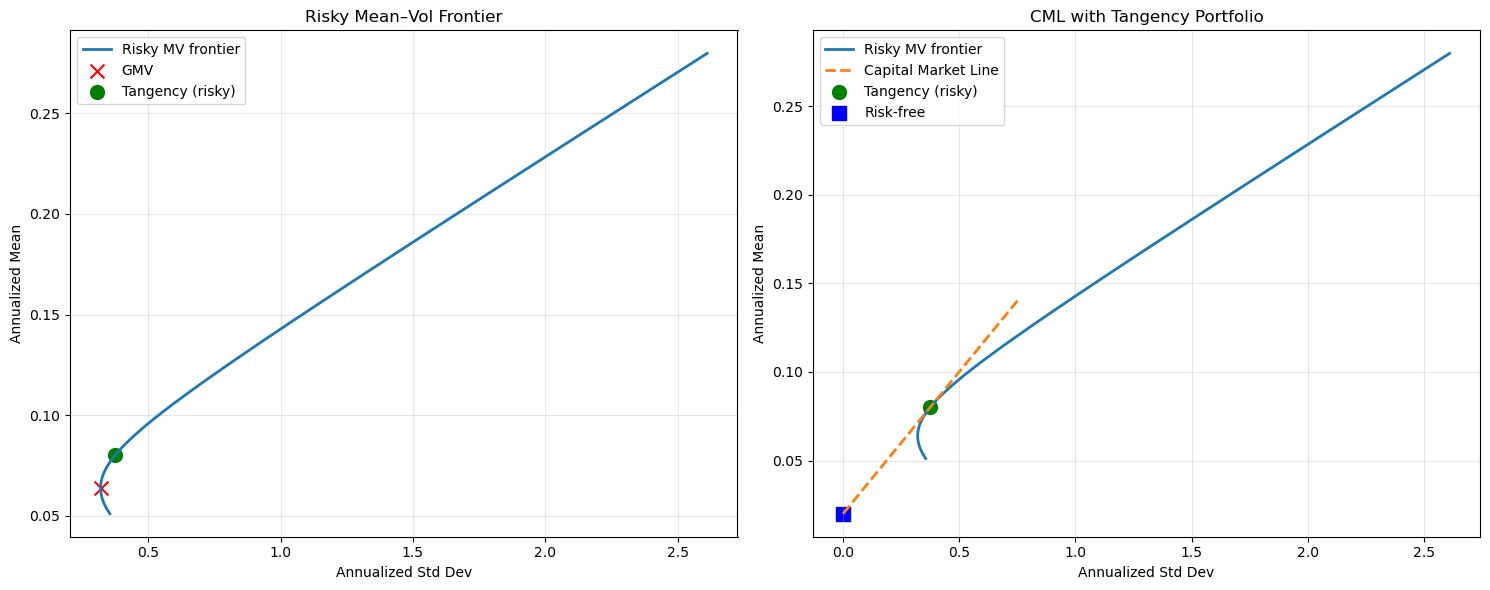

GMV weights: [ 0.0449  0.4636  0.382   0.0771 -0.2622  0.2946]
Tangency (risky) weights: [ 0.0788  0.2255  0.294   0.0723 -0.1107  0.4401]
Tangency Sharpe: 0.1602


In [ ]:
# --- Advanced example (replace with your estimates) ---
np.random.seed(0)
n = 6
A = np.random.randn(n, n)
Sigma = A @ A.T / n + 0.05*np.eye(n)   # PD covariance
mu = np.linspace(0.03, 0.12, n)        # ascending means
rf = 0.02

w_gmv = gmv_weights(Sigma)
w_tan = risky_tangency_weights(mu, Sigma, rf=rf)

sig_risky, mu_risky = mv_frontier(mu, Sigma, num=200)

# Risk-free mix line (CML): line through (sigma=0, mean=rf) tangent at risky tangency point
tan_sigma = float(np.sqrt(w_tan @ Sigma @ w_tan))
tan_mean = float(w_tan @ mu)
cml_sigmas = np.linspace(0, tan_sigma*2, 100)
# Slope is Sharpe of tangency: (tan_mean - rf) / tan_sigma
cml_means = rf + (tan_mean - rf) / tan_sigma * cml_sigmas

# --- Plot 1: Risky MV frontier ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.plot(sig_risky, mu_risky, label="Risky MV frontier", linewidth=2)
ax1.scatter([np.sqrt(w_gmv @ Sigma @ w_gmv)], [w_gmv @ mu], marker="x", s=100, label="GMV", color='red')
ax1.scatter([tan_sigma], [tan_mean], marker="o", s=100, label="Tangency (risky)", color='green')
ax1.set_xlabel("Annualized Std Dev")
ax1.set_ylabel("Annualized Mean")
ax1.legend()
ax1.set_title("Risky Mean–Vol Frontier")
ax1.grid(True, alpha=0.3)

# --- Plot 2: Capital Market Line (with rf) ---
ax2.plot(sig_risky, mu_risky, label="Risky MV frontier", linewidth=2)
ax2.plot(cml_sigmas, cml_means, label="Capital Market Line", linewidth=2, linestyle='--')
ax2.scatter([tan_sigma], [tan_mean], marker="o", s=100, label="Tangency (risky)", color='green')
ax2.scatter([0], [rf], marker="s", s=100, label="Risk-free", color='blue')
ax2.set_xlabel("Annualized Std Dev")
ax2.set_ylabel("Annualized Mean")
ax2.legend()
ax2.set_title("CML with Tangency Portfolio")
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("GMV weights:", np.round(w_gmv, 4))
print("Tangency (risky) weights:", np.round(w_tan, 4))
print("Tangency Sharpe:", np.round((tan_mean - rf)/tan_sigma, 4))


---

### References
- Back, *Asset Pricing and Portfolio Choice Theory*, Ch. 5.  
- Bodie, Kane, and Marcus, *Investments*, Ch. 7.